In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1zRzUOznck_4TJAZ3M_0fGuKrmGqaqpJi" -O dataset.csv

--2023-06-11 11:43:46--  https://drive.google.com/uc?export=download&id=1zRzUOznck_4TJAZ3M_0fGuKrmGqaqpJi
Resolving drive.google.com (drive.google.com)... 142.250.153.139, 142.250.153.100, 142.250.153.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.153.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0lnkm6qp6otgqk420mcl3rdlj5tbtkfg/1686483825000/00120167058189846992/*/1zRzUOznck_4TJAZ3M_0fGuKrmGqaqpJi?e=download&uuid=9c50dfa4-5de4-4826-96e8-91d964242512 [following]
--2023-06-11 11:43:47--  https://doc-14-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0lnkm6qp6otgqk420mcl3rdlj5tbtkfg/1686483825000/00120167058189846992/*/1zRzUOznck_4TJAZ3M_0fGuKrmGqaqpJi?e=download&uuid=9c50dfa4-5de4-4826-96e8-91d964242512
Resolving doc-14-48-docs.googleusercontent.com (doc-14-48-docs.googleusercontent.com)... 108.177.126.132, 

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head(10)

,id_soal,soal,jawaban,jawaban_benar,materi,jumlah_dikerjakan,jumlah_benar,kategori_soal
0,pm1,Nationalgeographic.co.id—Penelitian baru\r\nda...,(A) 360 cara\n(B) 720 cara\n(C) 1200 cara\n(D)...,(B) 720 cara,Peluang,432,84,sulit
1,pm2,Nationalgeographic.co.id — Para ilmuwan\r\ntel...,"(A) 2,25 × 10¹⁹\n(B) 22,5 × 10¹⁹\n(C) 1,6 × 10...","(A) 2,25 × 10¹⁹",Bilangan Berpangkat,709,109,sulit
2,pm3,Dalam suatu kelas terdapat 15 murid laki- laki...,(A) 78 dan 404/3\n'\n(B) 63 dan 404/3\n'\n(C) ...,(E) 78 dan 2√(101/3),Statistika,640,392,sedang
3,pm4,Sebuah keramik persegi panjang memiliki kelili...,(A) −3 ≤ x ≤ 7\n(B) 3 < x < 7\n(C) −3 ≤ x atau...,(D) 3 ≤ x ≤ 7,Pertidaksamaan Kuadrat,195,113,sedang
4,pm5,Sebuah kantor ekspedisi memberlakukan\r\nbiaya...,"(A) Rp42500, −\n(B) Rp32500, −\n(C) Rp45000, −...","(A) Rp42500, −",Fungsi Aljabar,833,713,mudah
5,pm6,"Pada sabtu sore, Joko mengirim x pesan\nper ja...",(A) 9xy\n(B) 20xy\n(C) 5x + 4y\n(D) 4x + 5y\n(...,(C) 5x + 4y,Model Matematika,923,384,sedang
6,pm7,Japri adalah seorang teknisi yang bekerja\ndi ...,(A) Japri bisa menyelesaikan perbaikan\nselama...,(B) Japri setiap minggunya\nmendapatkan 108 sm...,Model Matematika,691,384,sedang
7,pm8,"h = 3µ + 28,6\n\nSeorang dokter anak menggunak...","(A) 3\r\n(B) 5,7\r\n(C) 9,5\r\n(D) 14,3\r\n(E)...",(A) 3,Model Matematika,368,15,sulit
8,pm9,"b = 2,35 + 0,25x\nc = 1,75 + 0,40x\n\nPada sis...","(A) € 2,60\n(B) € 2,85\n(C) € 2,95\n(D) € 3,35...","(D) € 3,35",Sistem Persamaan Linear Dua Variabel,456,320,mudah
9,pm10,Marko membeli laptop di toko yang\nmemberikan ...,"(A) 0,88p\n(B) p/0.88\n(C) (0,8)(1,08)p\n(D) p...","(D) p/(0,8)(1,08)",Aritmatika Sosial,14,6,sedang


In [5]:
df.shape

(6000, 8)

In [6]:
df.dtypes

id_soal              object
soal                 object
jawaban              object
jawaban_benar        object
materi               object
jumlah_dikerjakan     int64
jumlah_benar          int64
kategori_soal        object
dtype: object

In [7]:
#rename columns
df.columns = ['idSoal', 'soal','jawaban', 'jawaban_benar', 'materi','jumlahDikerjakan','jumlahBenar','kategori']

In [8]:
# Check Missing Values
df.isnull().sum()

idSoal              0
soal                0
jawaban             0
jawaban_benar       0
materi              0
jumlahDikerjakan    0
jumlahBenar         0
kategori            0
dtype: int64

Text(0, 0.5, 'Frequency')

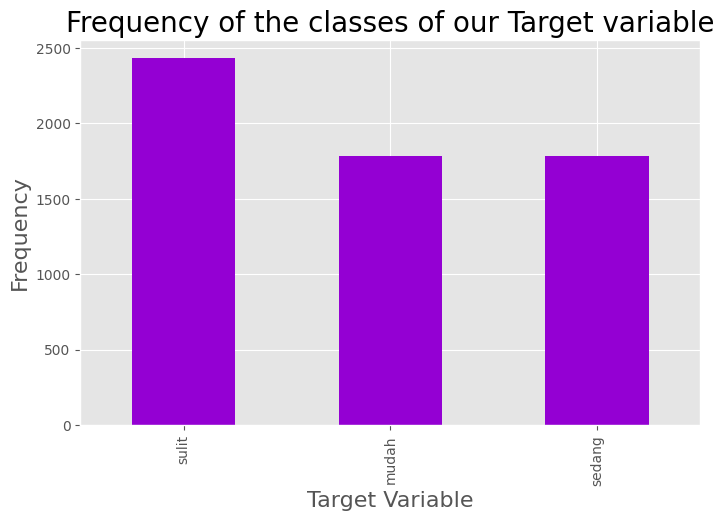

In [9]:
#Check the balance target
plt.style.use("ggplot")
df["kategori"].value_counts().plot(kind="bar", 
                                  figsize = (8,5), color = "darkviolet")
plt.title("Frequency of the classes of our Target variable", size=20)
plt.xlabel("Target Variable", size = 16)
plt.ylabel("Frequency", size = 16)

In [10]:
#drop unnecessary column
df.drop(['idSoal','jawaban','jawaban_benar'], axis=1, inplace=True)

In [11]:
df.drop(['soal','materi'], axis=1, inplace=True)

In [12]:
df.head()

,jumlahDikerjakan,jumlahBenar,kategori
0,432,84,sulit
1,709,109,sulit
2,640,392,sedang
3,195,113,sedang
4,833,713,mudah


In [13]:
# Split dataset to data train and data test
X = df.iloc[:,0:2].values
Y = df.iloc[:,2].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(Y)
Y = pd.get_dummies(y1).values

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [14]:
import tensorflow as tf

def classification_model():
    # Define the model
    model = tf.keras.models.Sequential([ 
        tf.keras.layers.Dense(6, input_shape = (2,) ,activation='relu'),
        tf.keras.layers.Dense(8, activation ='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ]) 

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
        
    return model

In [15]:
epochs = 20

model = classification_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 8)                 56        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train,y_train,validation_split=0.2,epochs=epochs)

Epoch 1/20
120/120 [==============================] - 1s 3ms/step - loss: 36.2436 - accuracy: 0.6060 - val_loss: 14.7184 - val_accuracy: 0.6844
Epoch 2/20
120/120 [==============================] - 0s 2ms/step - loss: 5.9545 - accuracy: 0.7018 - val_loss: 0.2090 - val_accuracy: 0.9115
Epoch 3/20
120/120 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 0.9815 - val_loss: 0.0702 - val_accuracy: 0.9792
Epoch 4/20
120/120 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9862 - val_loss: 0.0738 - val_accuracy: 0.9750
Epoch 5/20
120/120 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9854 - val_loss: 0.0600 - val_accuracy: 0.9854
Epoch 6/20
120/120 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9833 - val_loss: 0.0656 - val_accuracy: 0.9781
Epoch 7/20
120/120 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9857 - val_loss: 0.0570 - val_accuracy: 0.9854
Epoc

In [17]:
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

38/38 [==============================] - 0s 2ms/step


In [18]:
# Accuracy score
from sklearn.metrics import classification_report,r2_score
print(classification_report(y_test_class, y_pred_class))
print(f"r2 score: {r2_score(y_test_class, y_pred_class)}")

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       362
           1       0.95      0.97      0.96       358
           2       0.98      0.99      0.99       480

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200

r2 score: 0.9686896623701926
